In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("csv/82000278_Toamnei_CO2_2021_08_1week.csv")

In [3]:
dataframe.head()

,time,latitude,longitude,altitude,co2
0,1627862426,45.651464,25.615426,538,612
1,1627862486,45.651464,25.615426,538,610
2,1627862546,45.651464,25.615426,538,606
3,1627862606,45.651464,25.615426,538,609
4,1627862666,45.651464,25.615426,538,606


In [4]:
dataframe_size = len(dataframe.index)
dataframe_size

10070

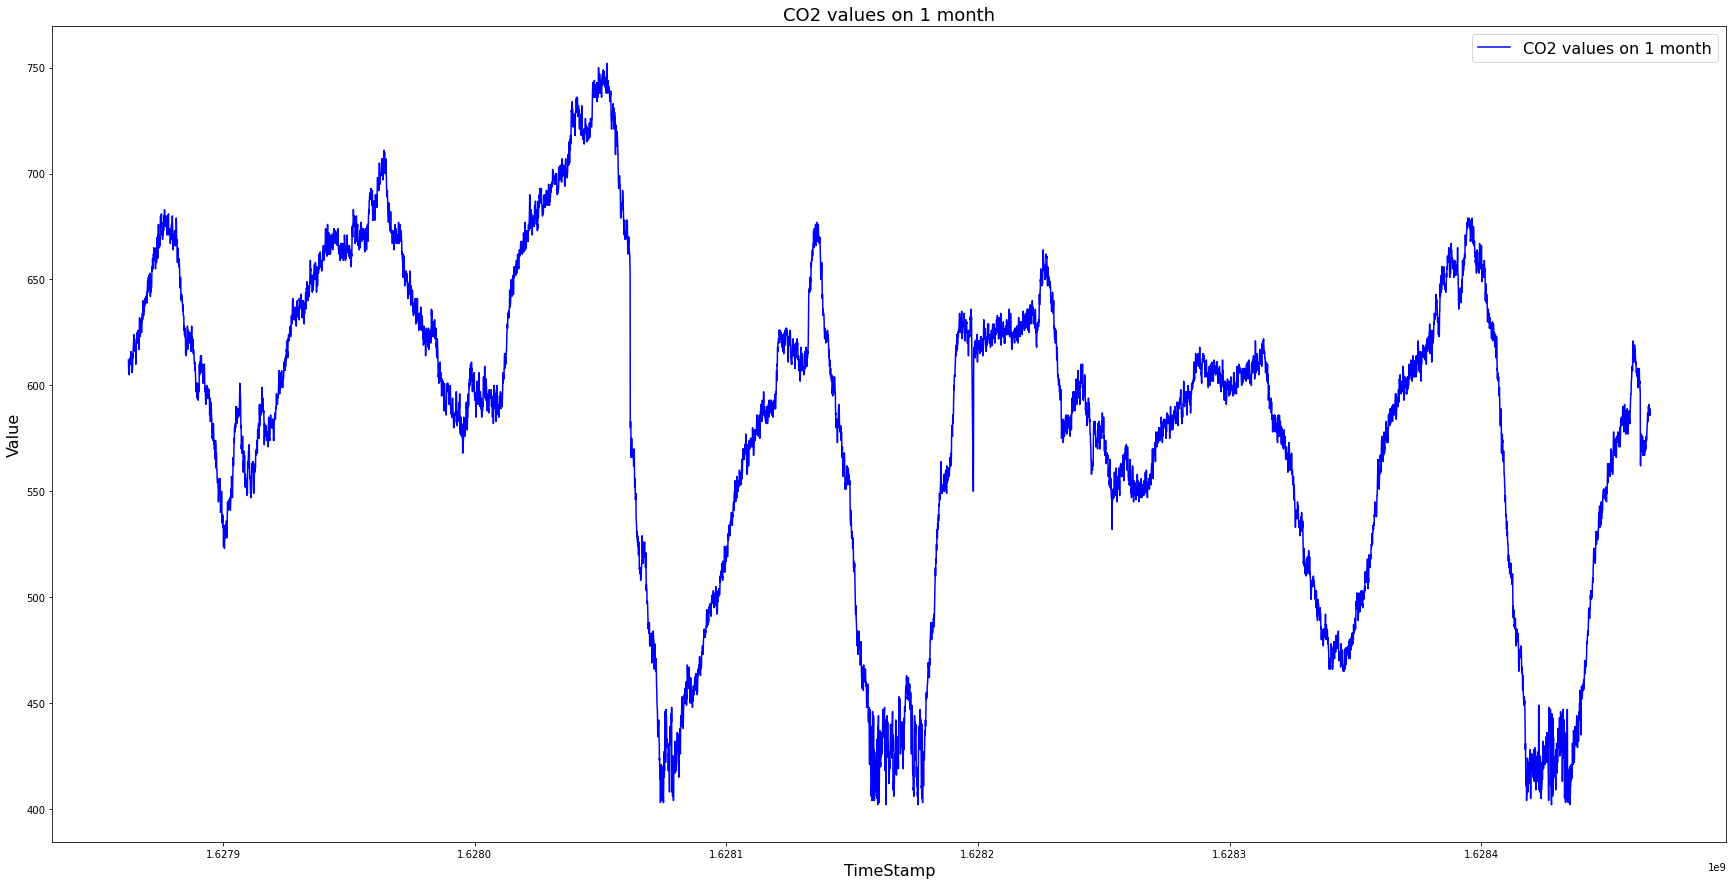

In [5]:
import matplotlib.pyplot as plt
plt.close("all")
# fig = plt.figure(figsize=(20,10), frameon=True)
plt.figure(figsize=(30,15))
# plt.plot(dataframe.get('time'), dataframe.get('pm10'), label="PM10 values on 1 month", color = "blue")
plt.plot(dataframe.get('time'), dataframe.get('co2'), label="CO2 values on 1 month", color = "blue")
# plt.scatter(dataframe.get('_source.TimeStamp'), dataframe.get('_source.Value'), color = "red")
plt.xlabel("TimeStamp", fontsize=16)
plt.ylabel("Value", fontsize=16)
# plt.title("PM10 values on 1 month", fontsize=18)
plt.title("CO2 values on 1 month", fontsize=18)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Tests_1month.jpg', bbox_inches = 'tight')
plt.show()

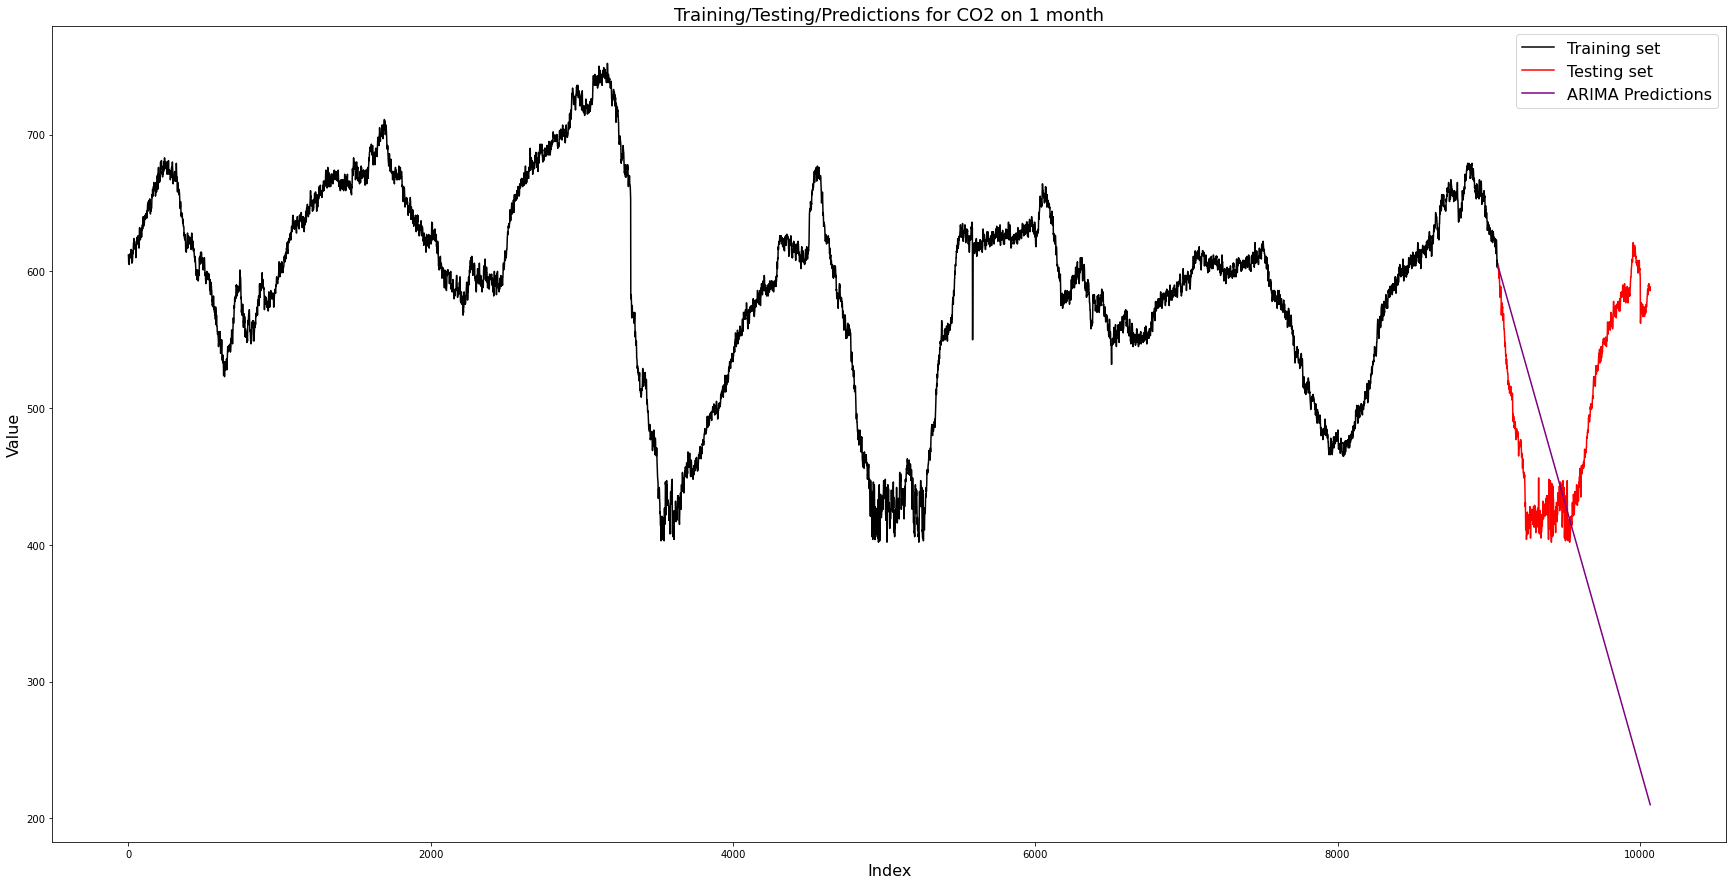

RMSE:  188.48081810170638


In [6]:
train = dataframe[dataframe.index < dataframe_size*(90/100)]
test = dataframe[dataframe.index >= dataframe_size*(90/100)]
# train = dataframe[dataframe.index < dataframe_size*(3/4)]
# test = dataframe[dataframe.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
# y = train['pm10']
y = train['co2']

ARMAmodel = ARIMA(y, order=(2,2,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
# plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(train.index, train.get('co2'), color = "black", label = "Training set")
# plt.plot(test.index, test.get('pm10'), color = "red", label = "Testing set")
plt.plot(test.index, test.get('co2'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
# plt.title("Training/Testing/Predictions for PM10 on 1 month", fontsize=18)
plt.title("Training/Testing/Predictions for CO2 on 1 month", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Tests_1month_ARIMA', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

# arima_rmse2 = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
arima_rmse2 = np.sqrt(mean_squared_error(test["co2"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse2)

In [7]:
y

0       612
1       610
2       606
3       609
4       606
       ... 
9058    606
9059    606
9060    605
9061    604
9062    603
Name: co2, Length: 9063, dtype: int64

In [8]:
y_pred_df

,lower co2,upper co2,Predictions
9063,596.049689,609.800193,602.924941
9064,593.123021,612.618617,602.870819
9065,591.374084,613.947696,602.660890
9066,590.055889,614.616824,602.336356
9067,588.885837,615.032402,601.959120
...,...,...,...
10065,-812.122684,1235.316138,211.596727
10066,-813.927239,1236.338425,211.205593
10067,-815.732444,1237.361361,210.814459
10068,-817.538297,1238.384946,210.423324


In [9]:
y_pred_out

9063     602.924941
9064     602.870819
9065     602.660890
9066     602.336356
9067     601.959120
            ...    
10065    211.596727
10066    211.205593
10067    210.814459
10068    210.423324
10069    210.032190
Name: Predictions, Length: 1007, dtype: float64